## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats.distributions import chi2
from scipy.stats import chisquare
from statsmodels.stats.proportion import proportions_chisquare
import seaborn as sns

## Import and Pre-process data

In [2]:
raw = pd.read_csv("Index2018.csv")
df_comp = raw.copy()
df_comp.date = pd.to_datetime(raw.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Creating Returns

In [5]:
df['returns'] = df.market_value.pct_change(1)*100

<ipython-input-5-6f3746182e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1)*100


## ACF and PACF Plot

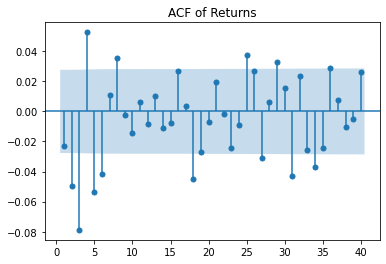

In [6]:
sgt.plot_acf(df.returns.dropna(), zero=False, lags=40)
plt.title("ACF of Returns")
plt.show()

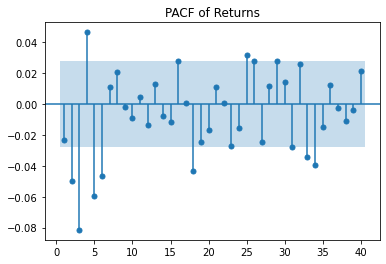

In [7]:
sgt.plot_pacf(df.returns.dropna(), zero=False, lags=40)
plt.title("PACF of Returns")
plt.show()

## Create LLR Test Function

In [8]:
def LLR_test(mod1, mod2, df=1):
    llf_mod1 = mod1.fit().llf
    llf_mod2 = mod2.fit().llf
    diff = (2*(llf_mod2- llf_mod1))
    p = chi2.sf(diff, df=df).round(3)
    return p

## Models Creation

### AR(1)

In [9]:
returns = df.returns.dropna()
model_ar_1 = ARIMA(returns, order=(1,0,0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Sun, 29 Nov 2020   AIC                          15865.497
Time:                        18:32:10   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA(1)

In [10]:
model_ma_1 = ARIMA(returns, order=(0,0,1))
result_ma_1 = model_ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Sun, 29 Nov 2020   AIC                          15865.190
Time:                        18:32:11   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA(1,1)

In [11]:
model_arma_1_1 = ARIMA(returns, order=(1,0,1))
result_arma_1_1 = model_arma_1_1.fit()
result_arma_1_1.summary()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Sun, 29 Nov 2020   AIC                          15841.000
Time:                        18:32:12   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7488.92
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
print(f"AR(1) vs ARMA(1,1) {LLR_test(model_ar_1, model_arma_1_1)}")
print(f"MA(1) vs ARMA(1,1) {LLR_test(model_ma_1, model_arma_1_1)}")

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR(1) vs ARMA(1,1) 0.0
MA(1) vs ARMA(1,1) 0.0


It's shown that ARMA is significantly better than AR and MA models.

From the ACF and PACF graph, it is shown that AR (p=6) and MA (q=8).

In [13]:
model_arma_6_8 = ARIMA(returns, order=(6,0,8))
result_arma_6_8 = model_arma_6_8.fit()
result_arma_6_8.summary()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 8)   Log Likelihood               -7881.970
Date:                Sun, 29 Nov 2020   AIC                          15795.940
Time:                        18:32:28   BIC                          15900.279
Sample:                    01-10-1994   HQIC                         15832.502
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.285      0.199      -0.010       0.048
ar.L1         -0.3089      0.137     -2.248      0.025      -0.578      -0.040
ar.L2         -0.5335      0.114     -4.687      0.000      -0.757      -0.310
ar.L3          0.4880      0.151      3.241      0.001       0.193       0.783
ar.L4          0.1579      0.091      1.726      0.084      -0.021       0.337
ar.L5          0.6965      0.080      8.721      0.000       0.540       0.853
ar.L6          0.2014      0.079      2.548      0.011       0.047       0.356
ma.L1          0.2849      0.137      2.072      0.038       0.015       0.554
ma.L2          0.4770      0.114      4.196      0.000       0.254       0.700
ma.L3         -0.6007      0.145     -4.134      0.000      -0.886      -0.316
ma.L4         -0.1491      0.093     -1.607      0.108      -0.331       0.033
ma.L5         -0.7436      0.077     -9.712      0.000      -0.894      -0.594
ma.L6         -0.1563      0.084     -1.856      0.064      -0.321       0.009
ma.L7          0.0106      0.015      0.714      0.475      -0.018       0.040
ma.L8          0.1007      0.016      6.418      0.000       0.070       0.131
sigma2         1.3532      0.015     91.150      0.000       1.324       1.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6517.09
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the p values, we can observe that some of the coefficients are insignificant from zero. We can reduce the size of parameters to half, which is ARMA(3,3).

In [14]:
model_arma_3_3 = ARIMA(returns, order=(3,0,3))
result_arma_3_3 = model_arma_3_3.fit()
result_arma_3_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Sun, 29 Nov 2020   AIC                          15803.030
Time:                        18:32:31   BIC                          15855.200
Sample:                    01-10-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.000      -0.399      -0.186
ar.L3          0.4469      0.062      7.253      0.000       0.326       0.568
ma.L1          0.1690      0.063      2.686      0.007       0.046       0.292
ma.L2          0.2260      0.052      4.328      0.000       0.124       0.328
ma.L3         -0.5442      0.056     -9.632      0.000      -0.655      -0.433
sigma2         1.3591      0.015     92.543      0.000       1.330       1.388
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              6862.43
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model_arma_1_1 = ARIMA(returns, order=(1,0,1))
result_arma_1_1 = model_arma_1_1.fit()
result_arma_1_1.summary()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Sun, 29 Nov 2020   AIC                          15841.000
Time:                        18:32:32   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7488.92
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
LLR_test(model_arma_1_1, model_arma_3_3, df=2)

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.0

From the LLR test, ARMA(3,3) performs better than ARMA(1,1). However, from ARMA(3,3) we still observe that some of the coefficients are insignificant from 0. A good and light weight models must lie between ARMA(3,3) and ARMA(1,1).

In [17]:
arma_models = dict()
for p in range(1,4):
    for q in range(1,4):
        model = ARIMA(returns, order=(p,0,q))
        result = model.fit()
        arma_models[f"{p}_{q}"] = model
        print(f"Model ARMA({p},{q})")
        print(result.summary())
        print("*"*100)  

Model ARMA(1,1)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Sun, 29 Nov 2020   AIC                          15841.000
Time:                        18:32:38   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model ARMA(2,1)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -7913.456
Date:                Sun, 29 Nov 2020   AIC                          15836.913
Time:                        18:32:42   BIC                          15869.519
Sample:                    01-10-1994   HQIC                         15848.338
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.283      0.200      -0.010       0.048
ar.L1          0.6544      0.058     11.355      0.000       0.541       0.767
ar.L2         -0.0433      0.010    

Lets observe ARMA (2,2). Here we can see that ARMA(2,2) has 2 components that is insignificant. Thus we should avoid it at all cost. Also, for ARMA(3,3) we also observe that there is one component that is insignificant.

In [18]:
LLR_test(arma_models["1_2"], arma_models["2_3"], df=2)

0.0

## ARMA(3,2) & ARMA(2,3)

In [19]:
model_arma_3_2 = arma_models["3_2"]
model_arma_2_3 = arma_models["2_3"]

result_arma_3_2 = model_arma_3_2.fit()
result_arma_2_3 = model_arma_2_3.fit()

In [20]:
res_arma_3_2 = result_arma_3_2.resid
res_arma_2_3 = result_arma_2_3.resid

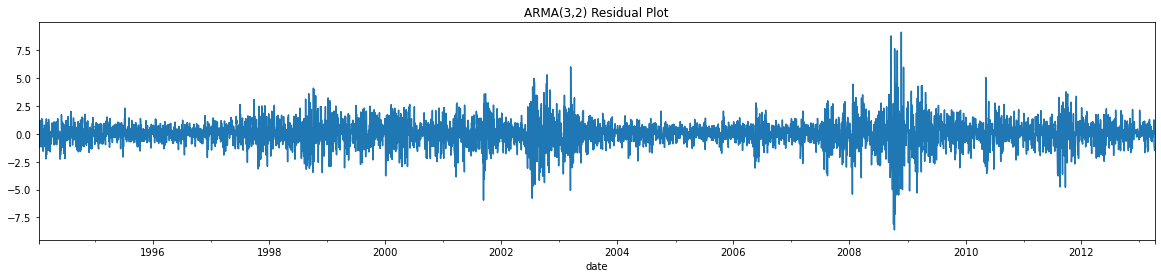

In [21]:
res_arma_3_2.plot(figsize=(20,4))
plt.title("ARMA(3,2) Residual Plot")
plt.show()

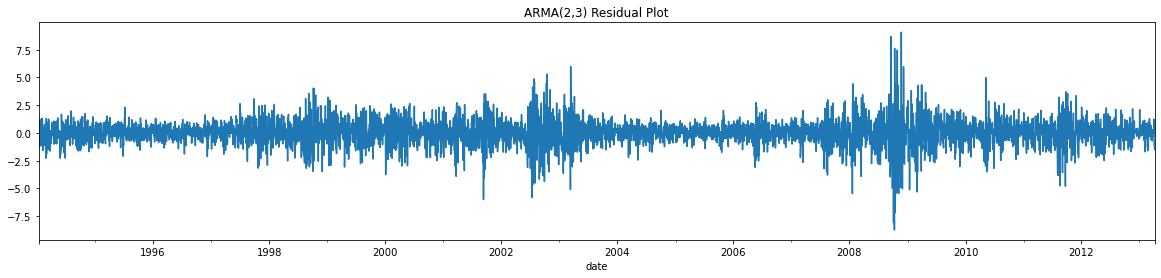

In [22]:
res_arma_2_3.plot(figsize=(20,4))
plt.title("ARMA(2,3) Residual Plot")
plt.show()

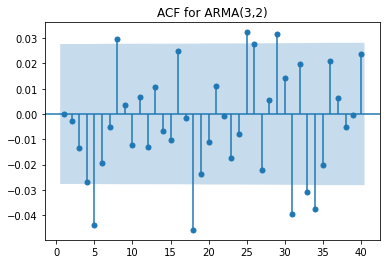

In [23]:
sgt.plot_acf(res_arma_3_2, zero=False, lags=40)
plt.title("ACF for ARMA(3,2)")
plt.show()

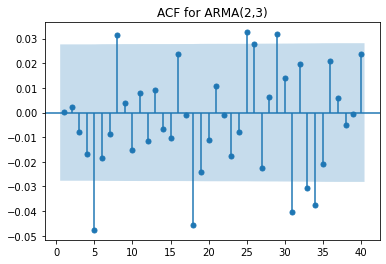

In [24]:
sgt.plot_acf(res_arma_2_3, zero=False, lags=40)
plt.title("ACF for ARMA(2,3)")
plt.show()

Both ACF curves show that lag of 5 has the most significant correlation. It suggests that we can try the lags of 5. Taking both returns and residuals 5 periods ago is redundant. We should focus only one of two.

### Model ARMA(P,5)

In [28]:
for p in range(1,6):
    model = ARIMA(returns, order=(p,0,5))
    results = model.fit()
    arma_models[f"{p}_5"] = model
    print(f"Model ARMA({p}, 5)")
    print(results.summary())
    print("*"*20)

Model ARMA(1, 5)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7890.974
Date:                Sun, 29 Nov 2020   AIC                          15797.949
Time:                        18:39:07   BIC                          15850.118
Sample:                    01-10-1994   HQIC                         15816.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.297      0.194      -0.010       0.047
ar.L1          0.3218      0.133      2.415      0.016       0.061       0.583
ma.L1         -0.3467      0.134   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(3, 5)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -7883.926
Date:                Sun, 29 Nov 2020   AIC                          15787.853
Time:                        18:39:18   BIC                          15853.064
Sample:                    01-10-1994   HQIC                         15810.704
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.263      0.207      -0.010       0.048
ar.L1         -0.1134      0.080     -1.420      0.156      -0.270       0.043
ar.L2         -0.8778      0.020   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(4, 5)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 5)   Log Likelihood               -7882.728
Date:                Sun, 29 Nov 2020   AIC                          15787.456
Time:                        18:39:26   BIC                          15859.189
Sample:                    01-10-1994   HQIC                         15812.592
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.285      0.199      -0.010       0.048
ar.L1          0.0227      0.081      0.279      0.780      -0.137       0.182
ar.L2         -0.6456      0.077   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(5, 5)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7883.652
Date:                Sun, 29 Nov 2020   AIC                          15791.305
Time:                        18:39:35   BIC                          15869.559
Sample:                    01-10-1994   HQIC                         15818.726
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0185      0.015      1.263      0.207      -0.010       0.047
ar.L1          0.0030      0.131      0.023      0.982      -0.254       0.260
ar.L2         -0.4903      0.083   

In [29]:
for q in range(1,6):
    model = ARIMA(returns, order=(5,0,q))
    results = model.fit()
    arma_models[f"5_{q}"] = model
    print(f"Model ARMA(5, {q})")
    print(results.summary())
    print("*"*20)

Model ARMA(5, 1)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Sun, 29 Nov 2020   AIC                          15794.623
Time:                        18:40:03   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model ARMA(5, 2)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -7885.667
Date:                Sun, 29 Nov 2020   AIC                          15789.334
Time:                        18:40:08   BIC                          15848.024
Sample:                    01-10-1994   HQIC                         15809.900
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.286      0.198      -0.010       0.048
ar.L1          0.2971      0.079      3.746      0.000       0.142       0.453
ar.L2         -0.4726      0.077   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(5, 4)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -7883.865
Date:                Sun, 29 Nov 2020   AIC                          15789.730
Time:                        18:40:21   BIC                          15861.463
Sample:                    01-10-1994   HQIC                         15814.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ar.L1          0.1350      0.082      1.649      0.099      -0.026       0.296
ar.L2         -0.6039      0.080   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(5, 5)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7883.652
Date:                Sun, 29 Nov 2020   AIC                          15791.305
Time:                        18:40:30   BIC                          15869.559
Sample:                    01-10-1994   HQIC                         15818.726
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0185      0.015      1.263      0.207      -0.010       0.047
ar.L1          0.0030      0.131      0.023      0.982      -0.254       0.260
ar.L2         -0.4903      0.083   

In [41]:
results_arma_1_5 = arma_models["1_5"].fit()
results_arma_5_1 = arma_models["5_1"].fit()

print(f"\n ARMA(1,5) LLF: \t{results_arma_1_5.llf}\t AIC: \t{results_arma_1_5.aic}")
print(f"\n ARMA(5,1) LLF: \t{results_arma_5_1.llf}\t AIC: \t{results_arma_5_1.aic}")


 ARMA(1,5) LLF: 	-7890.974434537868	 AIC: 	15797.948869075735

 ARMA(5,1) LLF: 	-7889.3113054536	 AIC: 	15794.6226109072


In [43]:
results_arma_2_3 = arma_models["2_3"].fit()
results_arma_3_2 = arma_models["3_2"].fit()

print(f"\n ARMA(2,3) LLF: \t{results_arma_2_3.llf}\t AIC: \t{results_arma_2_3.aic}")
print(f"\n ARMA(3,2) LLF: \t{results_arma_3_2.llf}\t AIC: \t{results_arma_3_2.aic}")


 ARMA(2,3) LLF: 	-7895.587261325962	 AIC: 	15805.174522651923

 ARMA(3,2) LLF: 	-7895.747490024978	 AIC: 	15805.494980049956


## Residual analysis for new model

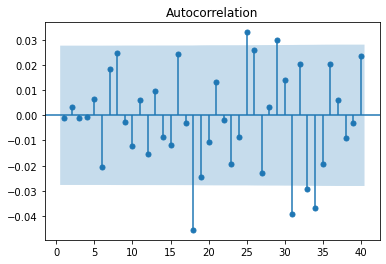

In [45]:
sgt.plot_acf(results_arma_5_1.resid, zero=False, lags=40)
plt.show()

## ARMA for Prices

Let us look at how ARMA performs on non-stationary data ie prices

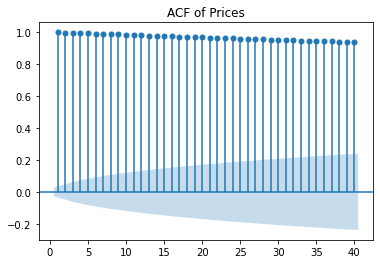

In [47]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF of Prices")
plt.show()

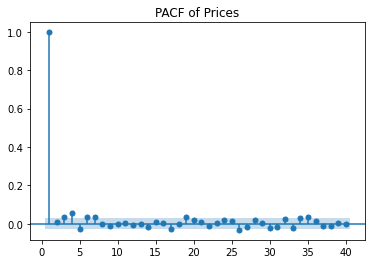

In [48]:
sgt.plot_pacf(df.market_value, zero=False, lags=40)
plt.title("PACF of Prices")
plt.show()

In [50]:
model_arma_1_1 = ARIMA(df.market_value, order=(1,0,1))
result_arma_1_1 = model_arma_1_1.fit()
result_arma_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27621.875
Date:                Sun, 29 Nov 2020   AIC                          55251.749
Time:                        19:52:03   BIC                          55277.835
Sample:                    01-07-1994   HQIC                         55260.890
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    366.501     13.887      0.000    4371.312    5807.970
ar.L1          0.9982      0.001   1189.159      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.894      0.058      -0.038       0.001
sigma2      3510.8350     41.068     85.489      0.000    3430.344    3591.326
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3280.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

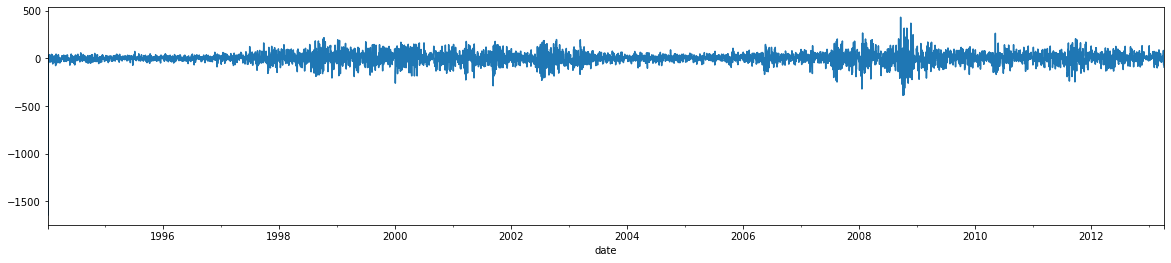

In [52]:
resid_arma_1_1 = result_arma_1_1.resid
resid_arma_1_1.plot(figsize=(20,4))

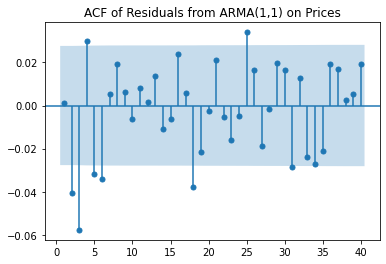

In [53]:
sgt.plot_acf(resid_arma_1_1, zero=False, lags=40)
plt.title("ACF of Residuals from ARMA(1,1) on Prices")
plt.show()

Here we can observe that the maximum lag is 6. Let us create a model of ARMA(6,6)

In [54]:
model_arma_6_6 = ARIMA(df.market_value, order=(6,0,6))
result_arma_6_6 = model_arma_6_6.fit()
result_arma_6_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27591.277
Date:                Sun, 29 Nov 2020   AIC                          55210.553
Time:                        20:28:36   BIC                          55301.853
Sample:                    01-07-1994   HQIC                         55242.546
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6408    511.835      9.944      0.000    4086.462    6092.820
ar.L1          0.7381      0.926      0.797      0.425      -1.077       2.553
ar.L2          0.2445      1.554      0.157      0.875      -2.802       3.291
ar.L3         -0.4061      1.222     -0.332      0.740      -2.801       1.988
ar.L4          0.3422      0.758      0.451      0.652      -1.144       1.828
ar.L5         -0.1100      0.418     -0.263      0.792      -0.929       0.709
ar.L6          0.1891      0.254      0.746      0.456      -0.308       0.686
ma.L1          0.2406      0.926      0.260      0.795      -1.573       2.055
ma.L2         -0.0390      0.667     -0.058      0.953      -1.347       1.269
ma.L3          0.3344      0.562      0.595      0.552      -0.767       1.436
ma.L4          0.0823      0.243      0.339      0.735      -0.394       0.558
ma.L5          0.1449      0.300      0.483      0.629      -0.444       0.734
ma.L6         -0.0865      0.085     -1.017      0.309      -0.253       0.080
sigma2      3468.7462     43.249     80.204      0.000    3383.980    3553.513
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2960.92
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Models of 6 AR lags

In [57]:
for q in range(1,6):
    model = ARIMA(returns, order=(6,0,q))
    results = model.fit()
    arma_models[f"6_{q}"] = model
    print(f"Model ARMA(6, {q})")
    print(results.summary())
    print("*"*20)

Model ARMA(6, 1)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 1)   Log Likelihood               -7886.788
Date:                Sun, 29 Nov 2020   AIC                          15791.575
Time:                        20:40:31   BIC                          15850.266
Sample:                    01-10-1994   HQIC                         15812.141
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.315      0.189      -0.009       0.047
ar.L1         -0.1437      0.188     -0.765      0.444      -0.512       0.224
ar.L2         -0.0549      0.009   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(6, 3)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 3)   Log Likelihood               -7885.236
Date:                Sun, 29 Nov 2020   AIC                          15792.472
Time:                        20:40:43   BIC                          15864.205
Sample:                    01-10-1994   HQIC                         15817.609
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.229      0.219      -0.011       0.049
ar.L1          1.0921      0.204      5.347      0.000       0.692       1.492
ar.L2         -0.8210      0.101   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(6, 4)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 4)   Log Likelihood               -7883.427
Date:                Sun, 29 Nov 2020   AIC                          15790.854
Time:                        20:40:53   BIC                          15869.108
Sample:                    01-10-1994   HQIC                         15818.275
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.318      0.188      -0.009       0.047
ar.L1          0.8022      0.116      6.903      0.000       0.574       1.030
ar.L2         -0.7146      0.096   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(6, 5)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 5)   Log Likelihood               -7883.158
Date:                Sun, 29 Nov 2020   AIC                          15792.317
Time:                        20:41:02   BIC                          15877.092
Sample:                    01-10-1994   HQIC                         15822.023
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.273      0.203      -0.010       0.048
ar.L1         -0.3753      0.606     -0.619      0.536      -1.564       0.813
ar.L2         -0.4966      0.110   

## Models of 6 MA lags

In [58]:
for p in range(1,6):
    model = ARIMA(returns, order=(p,0,6))
    results = model.fit()
    arma_models[f"{p}_6"] = model
    print(f"Model ARMA({p}, 6)")
    print(results.summary())
    print("*"*20)

Model ARMA(1, 6)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 6)   Log Likelihood               -7889.163
Date:                Sun, 29 Nov 2020   AIC                          15796.326
Time:                        20:41:04   BIC                          15855.016
Sample:                    01-10-1994   HQIC                         15816.892
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.311      0.190      -0.009       0.047
ar.L1         -0.0697      0.225     -0.310      0.756      -0.510       0.371
ma.L1          0.0457      0.224   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(4, 6)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 6)   Log Likelihood               -7883.904
Date:                Sun, 29 Nov 2020   AIC                          15791.809
Time:                        20:41:23   BIC                          15870.063
Sample:                    01-10-1994   HQIC                         15819.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.255      0.209      -0.011       0.048
ar.L1         -1.0141      6.292     -0.161      0.872     -13.346      11.318
ar.L2         -0.9753      0.707   

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model ARMA(5, 6)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 6)   Log Likelihood               -7882.349
Date:                Sun, 29 Nov 2020   AIC                          15790.698
Time:                        20:41:33   BIC                          15875.473
Sample:                    01-10-1994   HQIC                         15820.404
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.8547      0.218     -3.918      0.000      -1.282      -0.427
ar.L2         -0.6128      0.107   

In [60]:
model_arma_6_1 = arma_models["6_1"]
results_arma_6_1 = model_arma_6_1.fit()

model_arma_6_3 = arma_models["6_3"]
results_arma_6_3 = model_arma_6_3.fit()

model_arma_5_6 = arma_models["5_6"]
results_arma_5_6 = model_arma_5_6.fit()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
print(f"\n ARMA(6,1) LLF: \t{results_arma_6_1.llf}\t AIC: \t{results_arma_6_1.aic}")
print(f"\n ARMA(6,3) LLF: \t{results_arma_6_3.llf}\t AIC: \t{results_arma_6_3.aic}")
print(f"\n ARMA(5,6) LLF: \t{results_arma_5_6.llf}\t AIC: \t{results_arma_5_6.aic}")


 ARMA(6,1) LLF: 	-7886.787682947535	 AIC: 	15791.57536589507

 ARMA(6,3) LLF: 	-7885.236166269082	 AIC: 	15792.472332538164

 ARMA(5,6) LLF: 	-7882.348752013994	 AIC: 	15790.697504027989


ARMA(5,6) has the highest LLF and smallest value of AIC thus ARMA(5,6) is our selected model.

Proceed to perform residual analysis.

## Residual Analysis on ARMA(5,6)

In [63]:
residuals_arma_5_6 = results_arma_5_6.resid

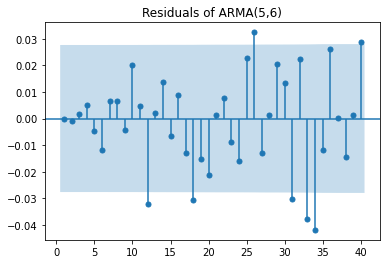

In [66]:
sgt.plot_acf(residuals_arma_5_6, zero=False, lags=40)
plt.title("Residuals of ARMA(5,6)")
plt.show()

## Compare ARMA for Returns vs ARMA for Prices

Here we will compare the performance of ARMA(5,1) for Returns and ARMA(5,6) for prices

In [67]:
model_arma_5_1 = ARIMA(returns, order=(5,0,1))
result_arma_5_1 = model_arma_5_1.fit()
result_arma_5_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Sun, 29 Nov 2020   AIC                          15794.623
Time:                        20:54:23   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009     -4.852      0.000      -0.064      -0.027
ar.L3         -0.0651      0.010     -6.435      0.000      -0.085      -0.045
ar.L4          0.0742      0.012      6.092      0.000       0.050       0.098
ar.L5         -0.0813      0.009     -9.480      0.000      -0.098      -0.064
ma.L1         -0.3682      0.106     -3.461      0.001      -0.577      -0.160
sigma2         1.3570      0.015     92.269      0.000       1.328       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6468.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
model_arma_5_6 = ARIMA(df.market_value, order=(5,0,6))
result_arma_5_6 = model_arma_5_6.fit()
result_arma_5_6.summary()

D:\anaconda3\envs\time-series-tutorials\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27589.736
Date:                Sun, 29 Nov 2020   AIC                          55205.472
Time:                        20:55:07   BIC                          55290.250
Sample:                    01-07-1994   HQIC                         55235.179
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6407   1649.380      3.086      0.002    1856.916    8322.365
ar.L1          0.6742      0.627      1.076      0.282      -0.554       1.902
ar.L2         -0.3188      0.705     -0.452      0.651      -1.700       1.063
ar.L3          0.2152      0.611      0.352      0.725      -0.983       1.413
ar.L4          0.5398      0.499      1.083      0.279      -0.437       1.517
ar.L5         -0.1111      0.105     -1.055      0.291      -0.318       0.095
ma.L1          0.3019      0.626      0.482      0.629      -0.925       1.528
ma.L2          0.5926      0.142      4.182      0.000       0.315       0.870
ma.L3          0.3186      0.506      0.630      0.529      -0.673       1.310
ma.L4         -0.1502      0.097     -1.556      0.120      -0.339       0.039
ma.L5         -0.0883      0.013     -6.968      0.000      -0.113      -0.063
ma.L6         -0.0468      0.063     -0.747      0.455      -0.170       0.076
sigma2      3464.6477     42.264     81.975      0.000    3381.811    3547.485
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3022.20
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
print(f"\n ARMA(5,1) of Return LLF: \t{result_arma_5_1.llf}\t AIC: \t{result_arma_5_1.aic}")
print(f"\n ARMA(5,6) of Prices LLF: \t{result_arma_5_6.llf}\t AIC: \t{result_arma_5_6.aic}")


 ARMA(5,1) of Return LLF: 	-7889.3113054536	 AIC: 	15794.6226109072

 ARMA(5,6) of Prices LLF: 	-27589.735807190526	 AIC: 	55205.47161438105


Here, we observe that ARMA on stationary  data shows higher LLF and lower AIC value. Thus we can conclude that ARMA works on non-stationary data as well but it doesn't work as good as if it is on stationary data.